In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("Company_Data.csv")

# Convert 'Sales' into a categorical variable
data['Sales_Category'] = pd.qcut(data['Sales'], q=2, labels=['Low', 'High'])

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'])

# Define features and target variable
X = data_encoded.drop(['Sales', 'Sales_Category'], axis=1)
y = data_encoded['Sales_Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='High')
recall = recall_score(y_test, y_pred, pos_label='High')
f1 = f1_score(y_test, y_pred, pos_label='High')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.725
Precision: 0.7441860465116279
Recall: 0.7441860465116279
F1 Score: 0.7441860465116278


In [2]:
# Display the column names
print(data.columns)



Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_Category'],
      dtype='object')


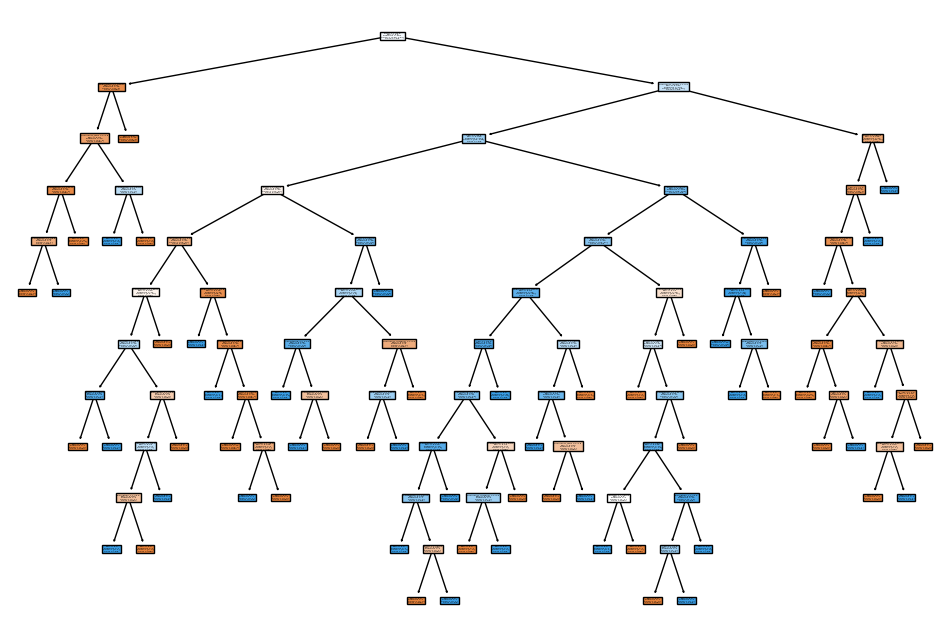

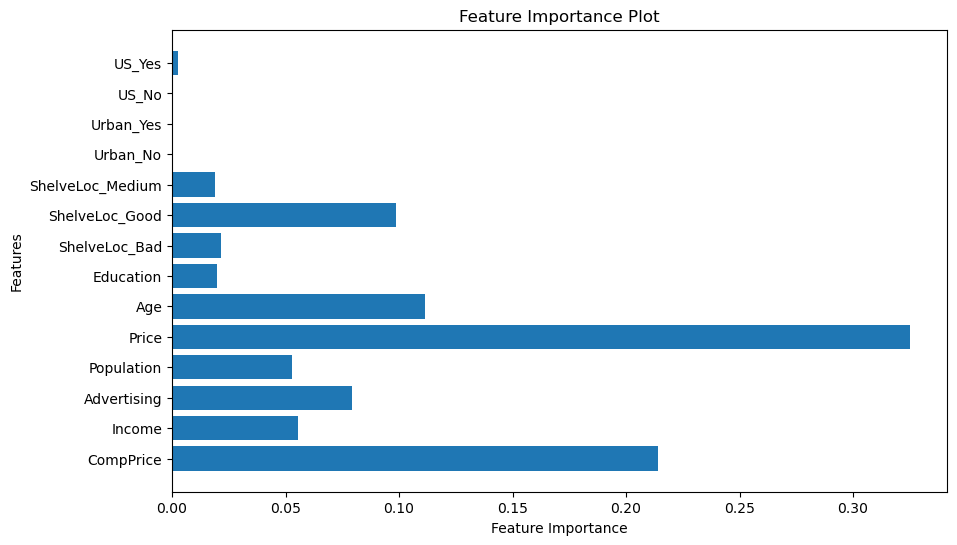

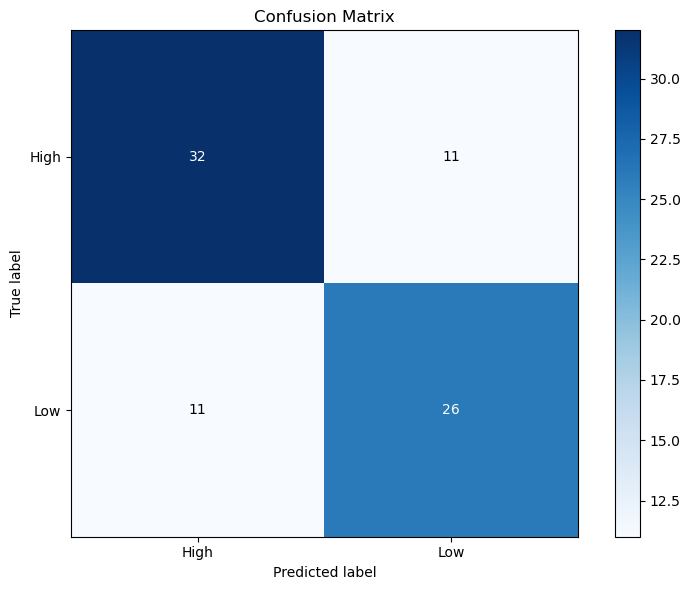

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

# Load the dataset
data = pd.read_csv("Company_Data.csv")

# Convert 'Sales' into a categorical variable
data['Sales_Category'] = pd.qcut(data['Sales'], q=2, labels=['Low', 'High'])

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'])

# Define features and target variable
X = data_encoded.drop(['Sales', 'Sales_Category'], axis=1)
y = data_encoded['Sales_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree structure
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, clf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# Generate confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique())
plt.yticks(tick_marks, y.unique())

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


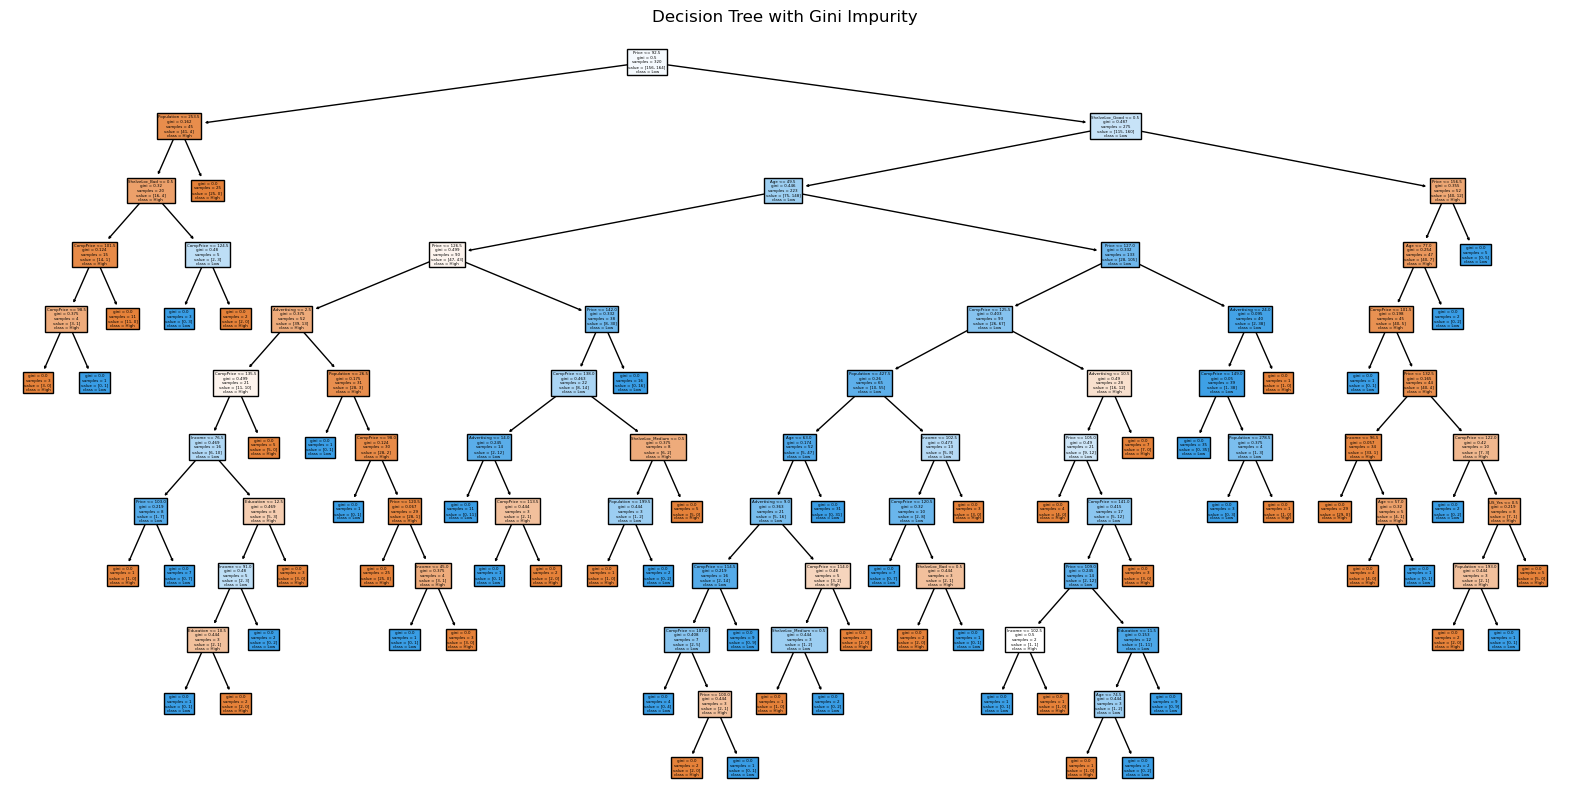

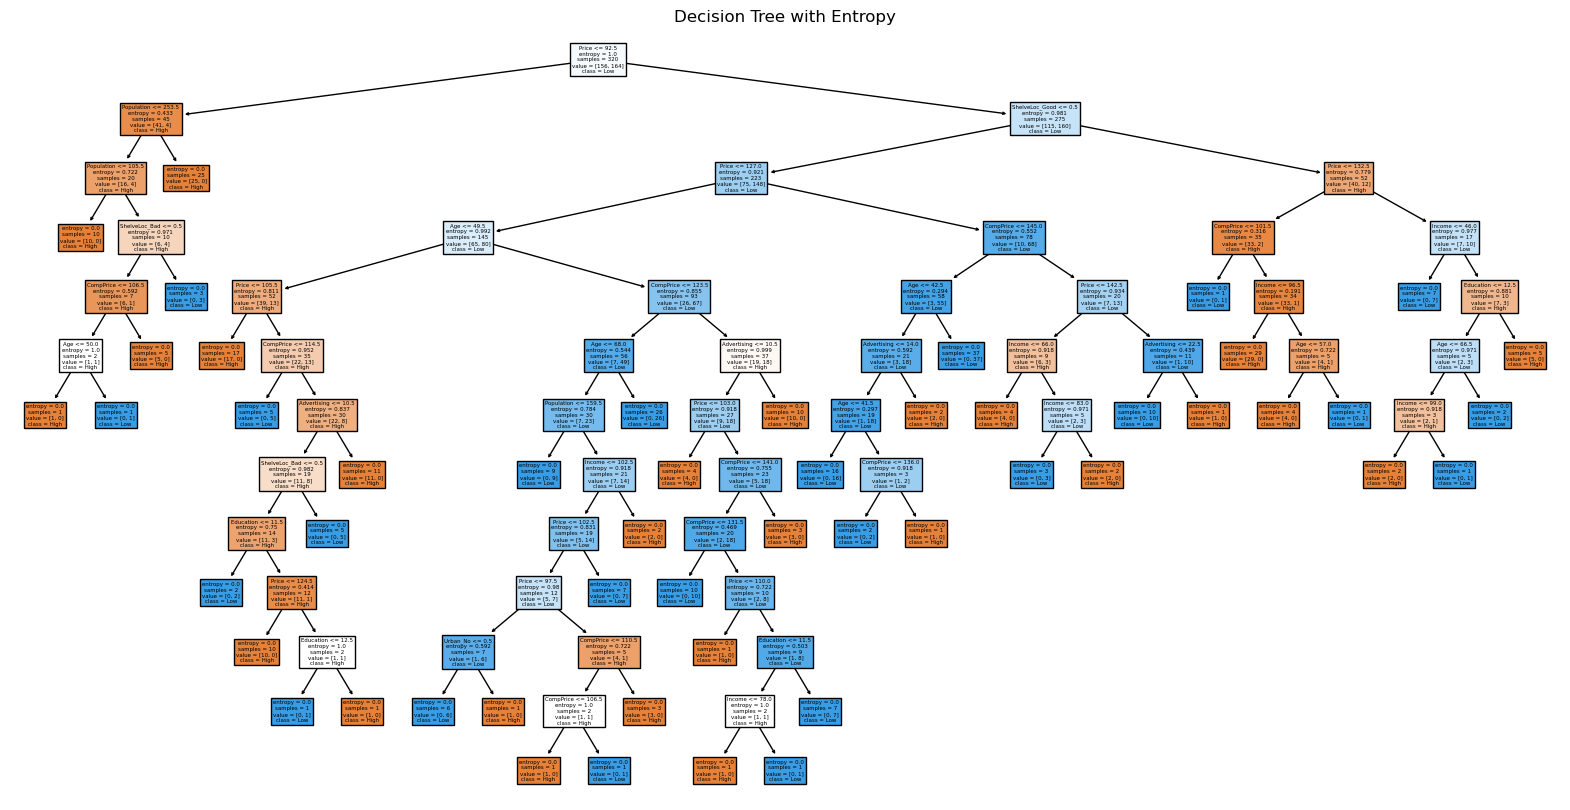

Gini Impurity Metrics:
Accuracy: 0.725
Precision: 0.7441860465116279
Recall: 0.7441860465116279
F1 Score: 0.7441860465116278

Entropy Metrics:
Accuracy: 0.65
Precision: 0.6829268292682927
Recall: 0.6511627906976745
F1 Score: 0.6666666666666667


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("Company_Data.csv")

# Convert 'Sales' into a categorical variable
data['Sales_Category'] = pd.qcut(data['Sales'], q=2, labels=['Low', 'High'])

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'])

# Define features and target variable
X = data_encoded.drop(['Sales', 'Sales_Category'], axis=1)
y = data_encoded['Sales_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier with Gini impurity
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Train the decision tree classifier with Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Visualize the decision tree with Gini impurity
plt.figure(figsize=(20,10))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=clf_gini.classes_)
plt.title('Decision Tree with Gini Impurity')
plt.show()

# Visualize the decision tree with Entropy
plt.figure(figsize=(20,10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=clf_entropy.classes_)
plt.title('Decision Tree with Entropy')
plt.show()

# Evaluate the decision tree classifier with Gini impurity
y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, pos_label='High')
recall_gini = recall_score(y_test, y_pred_gini, pos_label='High')
f1_gini = f1_score(y_test, y_pred_gini, pos_label='High')

# Evaluate the decision tree classifier with Entropy
y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, pos_label='High')
recall_entropy = recall_score(y_test, y_pred_entropy, pos_label='High')
f1_entropy = f1_score(y_test, y_pred_entropy, pos_label='High')

print("Gini Impurity Metrics:")
print("Accuracy:", accuracy_gini)
print("Precision:", precision_gini)
print("Recall:", recall_gini)
print("F1 Score:", f1_gini)

print("\nEntropy Metrics:")
print("Accuracy:", accuracy_entropy)
print("Precision:", precision_entropy)
print("Recall:", recall_entropy)
print("F1 Score:", f1_entropy)


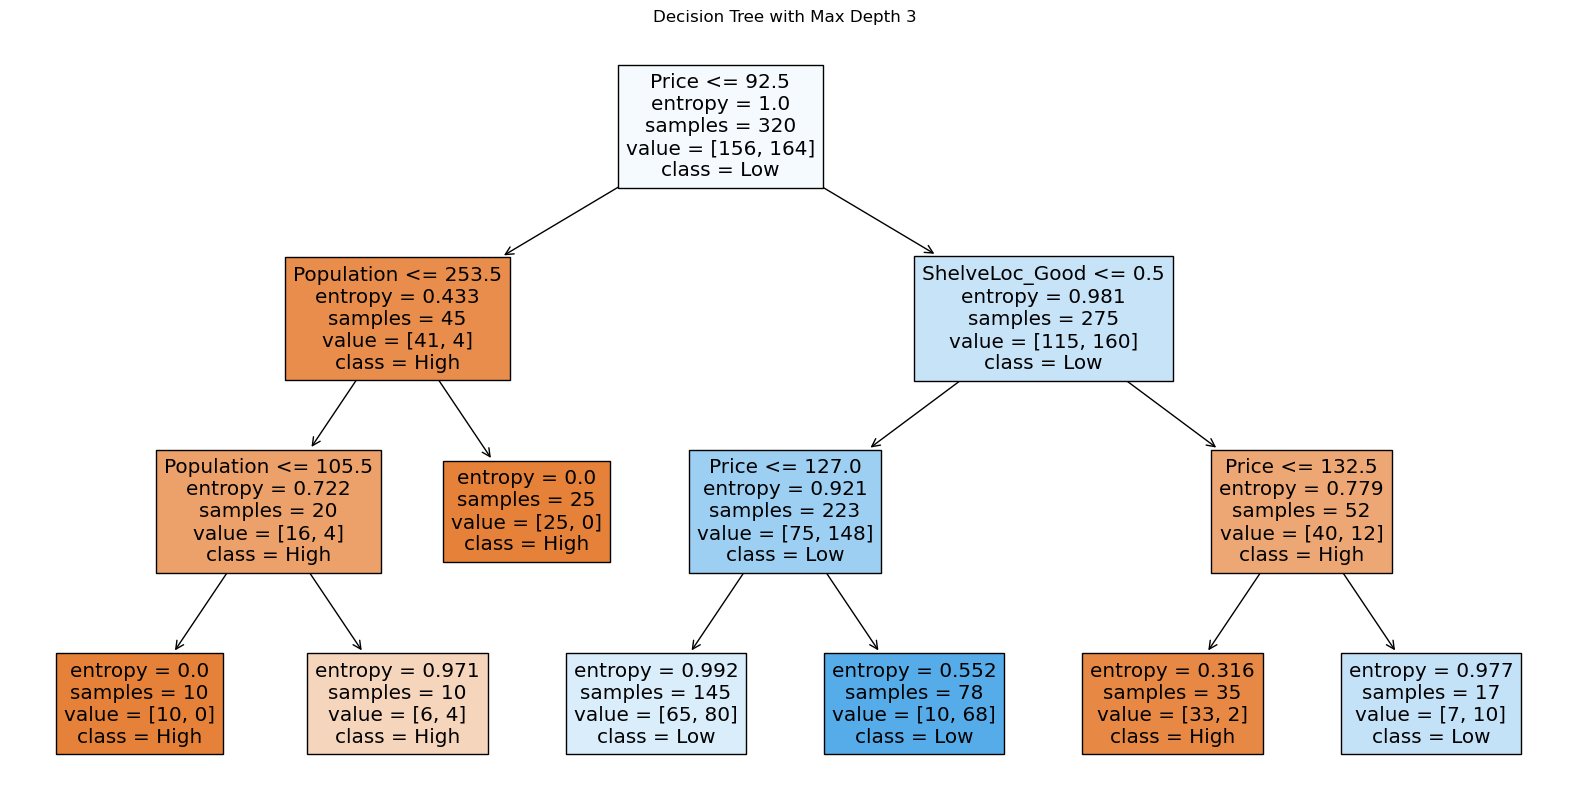

Metrics for Max Depth 3:
Accuracy: 0.7375
Precision: 0.8666666666666667
Recall: 0.6046511627906976
F1 Score: 0.7123287671232877




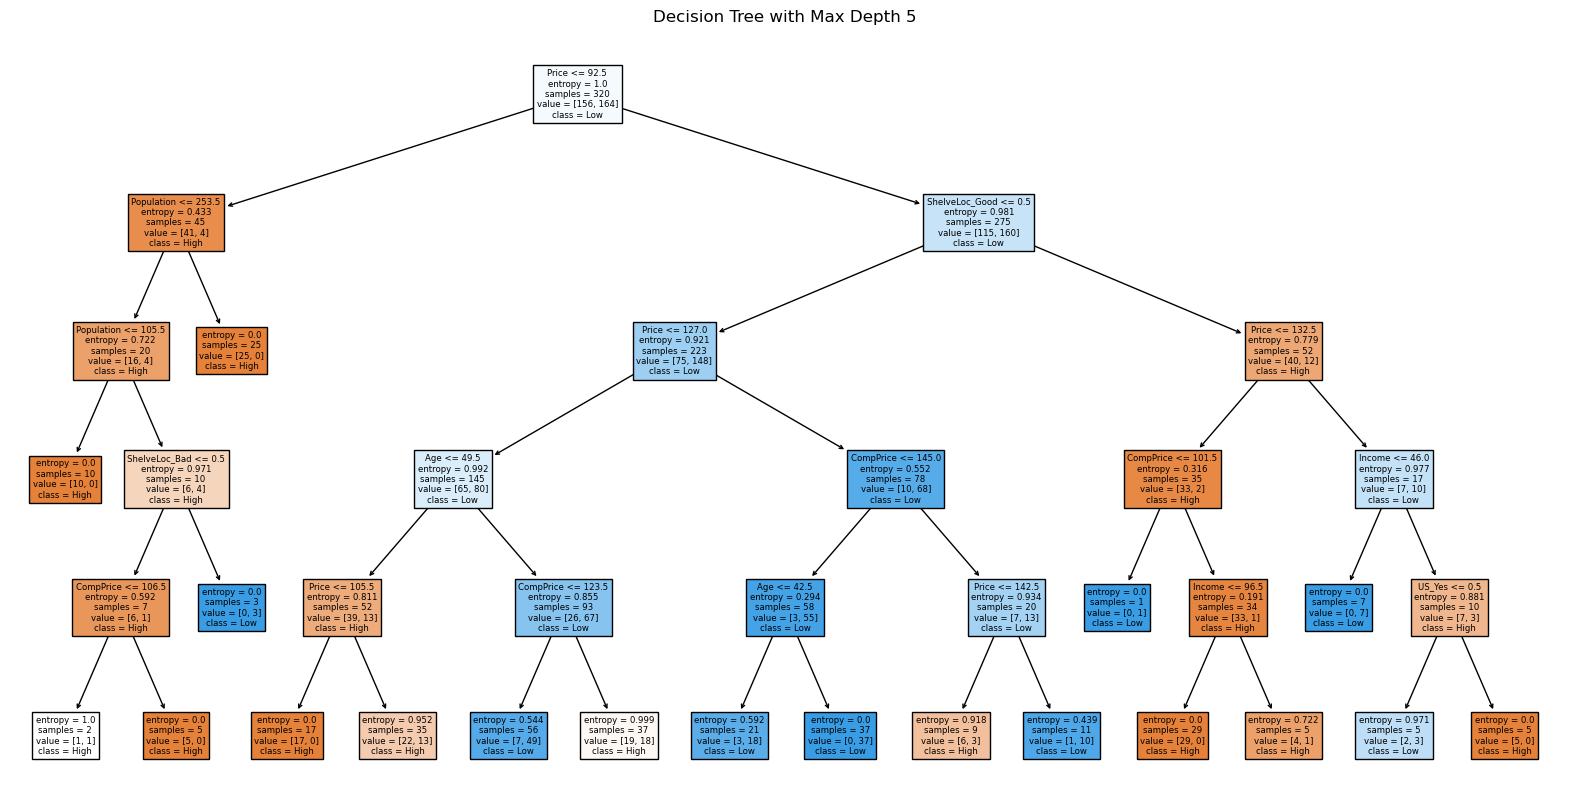

Metrics for Max Depth 5:
Accuracy: 0.6875
Precision: 0.6875
Recall: 0.7674418604651163
F1 Score: 0.7252747252747254




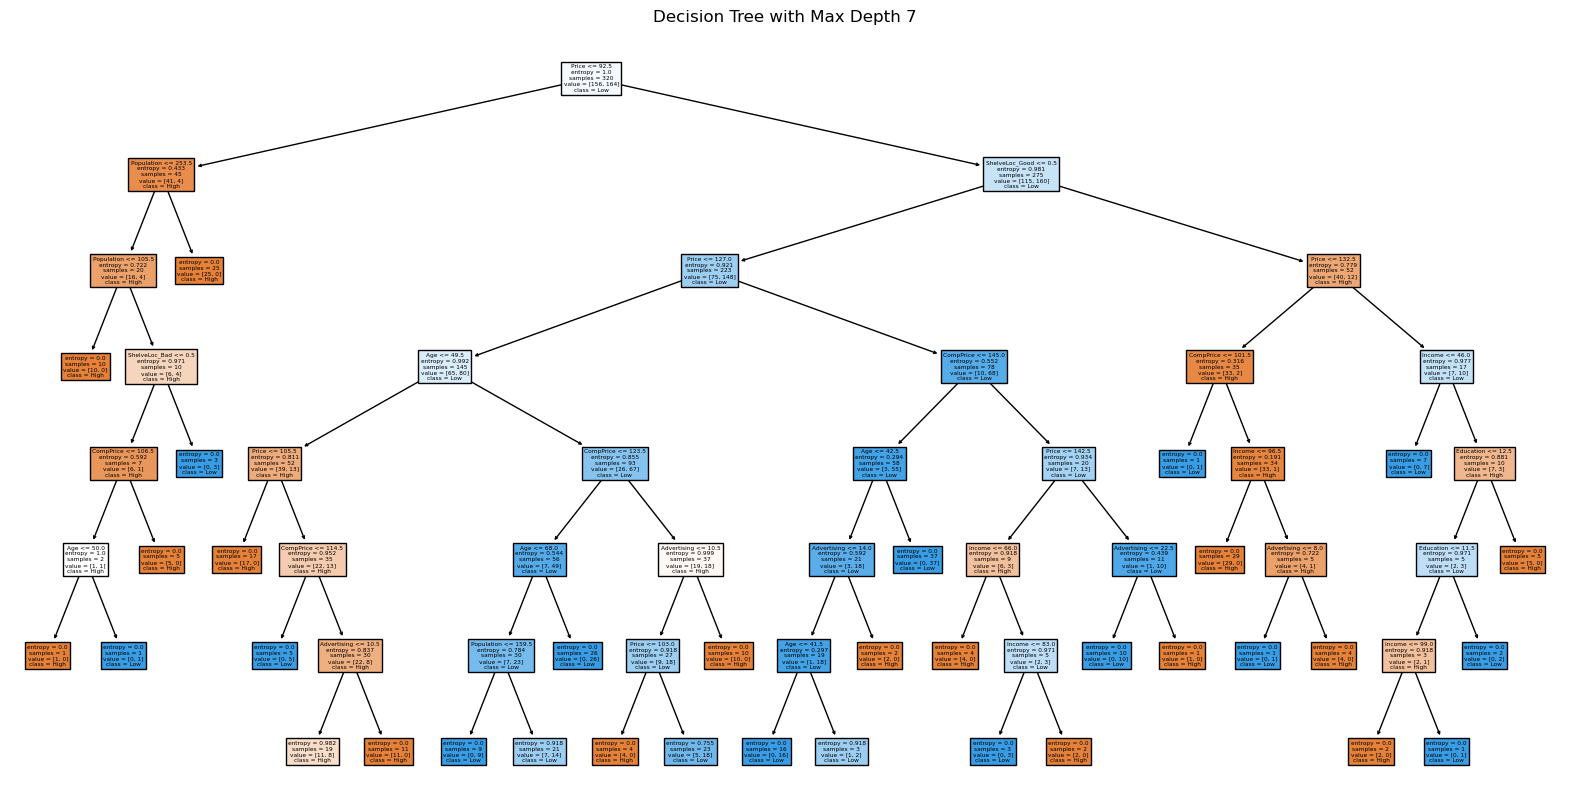

Metrics for Max Depth 7:
Accuracy: 0.6875
Precision: 0.7142857142857143
Recall: 0.6976744186046512
F1 Score: 0.7058823529411765




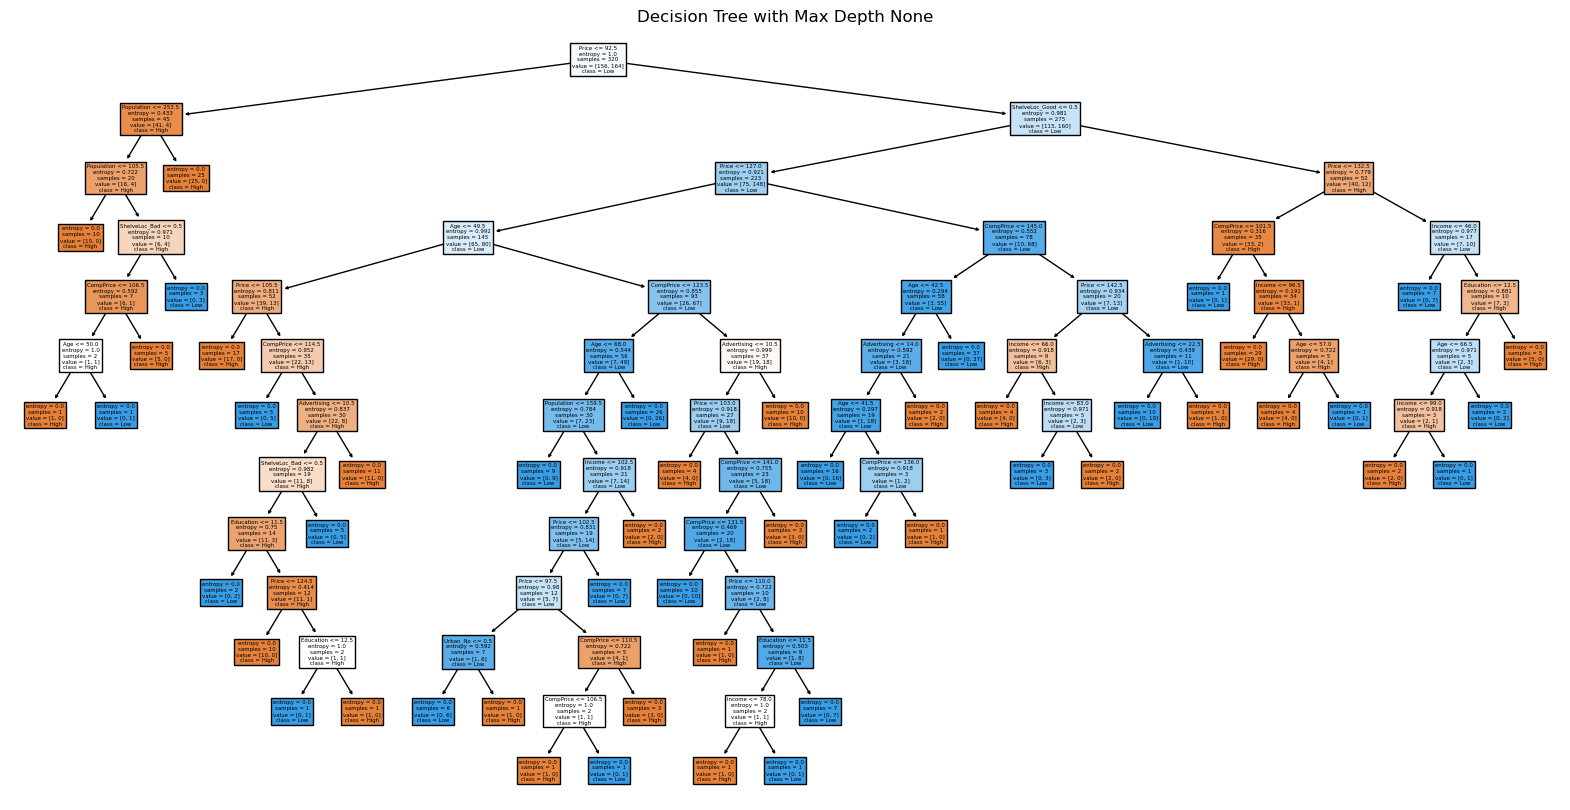

Metrics for Max Depth None:
Accuracy: 0.65
Precision: 0.6829268292682927
Recall: 0.6511627906976745
F1 Score: 0.6666666666666667




In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("Company_Data.csv")

# Convert 'Sales' into a categorical variable
data['Sales_Category'] = pd.qcut(data['Sales'], q=2, labels=['Low', 'High'])

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'])

# Define features and target variable
X = data_encoded.drop(['Sales', 'Sales_Category'], axis=1)
y = data_encoded['Sales_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of max_depth values to try
max_depths = [3, 5, 7, None]

for max_depth in max_depths:
    # Train the decision tree classifier with specified max_depth
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
    plt.title(f'Decision Tree with Max Depth {max_depth if max_depth is not None else "None"}')
    plt.show()

    # Evaluate the decision tree classifier
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='High')
    recall = recall_score(y_test, y_pred, pos_label='High')
    f1 = f1_score(y_test, y_pred, pos_label='High')

    print(f"Metrics for Max Depth {max_depth if max_depth is not None else 'None'}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")


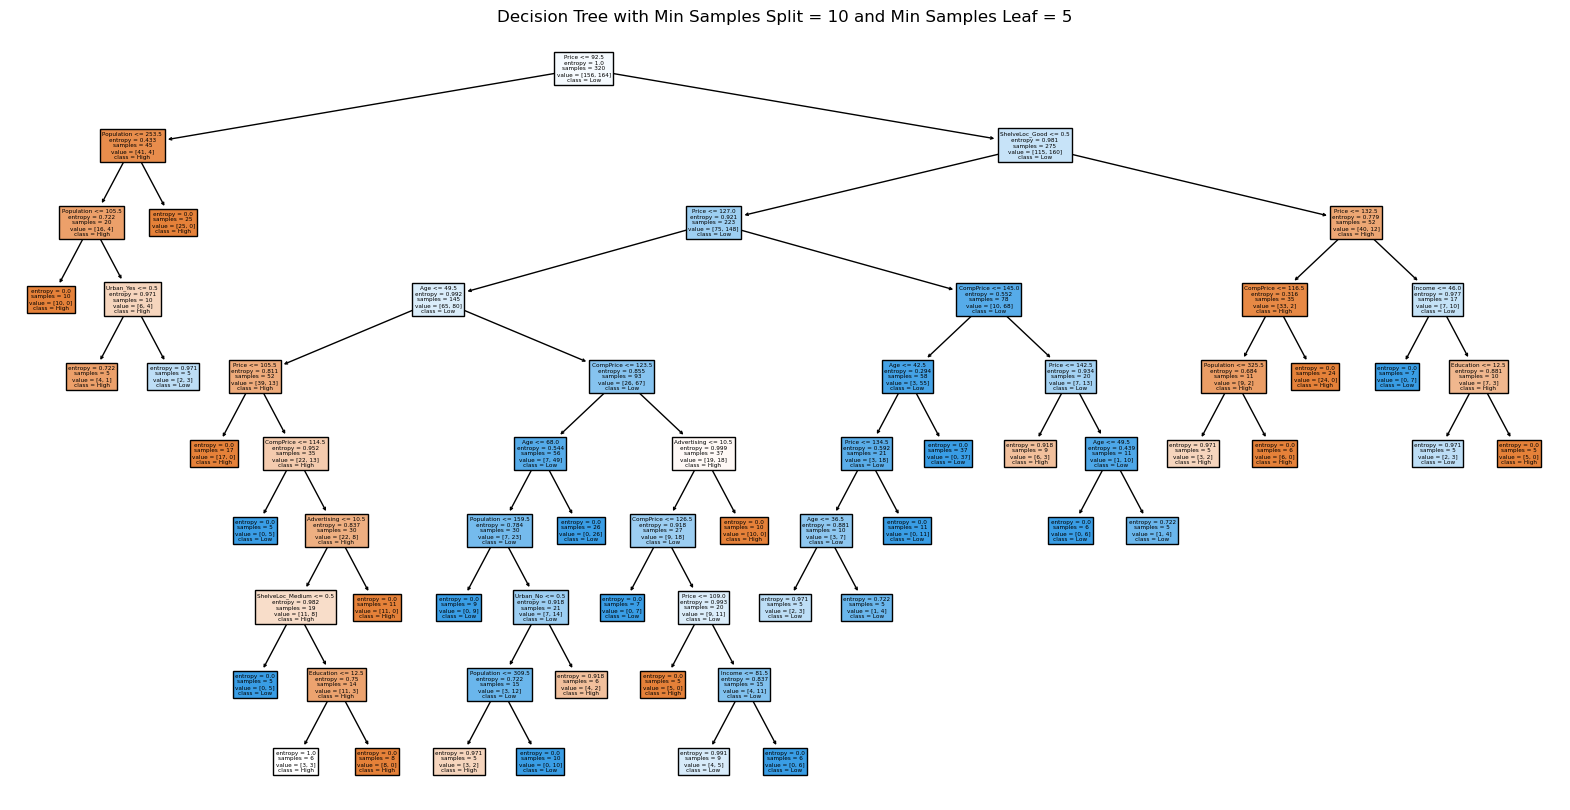

Metrics:
Accuracy: 0.725
Precision: 0.7333333333333333
Recall: 0.7674418604651163
F1 Score: 0.7499999999999999


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("Company_Data.csv")

# Convert 'Sales' into a categorical variable
data['Sales_Category'] = pd.qcut(data['Sales'], q=2, labels=['Low', 'High'])

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'])

# Define features and target variable
X = data_encoded.drop(['Sales', 'Sales_Category'], axis=1)
y = data_encoded['Sales_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the minimum number of samples required to split an internal node
min_samples_split = 10

# Define the minimum number of samples required to be at a leaf node
min_samples_leaf = 5

# Train the decision tree classifier with specified parameters
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.title(f'Decision Tree with Min Samples Split = {min_samples_split} and Min Samples Leaf = {min_samples_leaf}')
plt.show()

# Evaluate the decision tree classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='High')
recall = recall_score(y_test, y_pred, pos_label='High')
f1 = f1_score(y_test, y_pred, pos_label='High')

print("Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


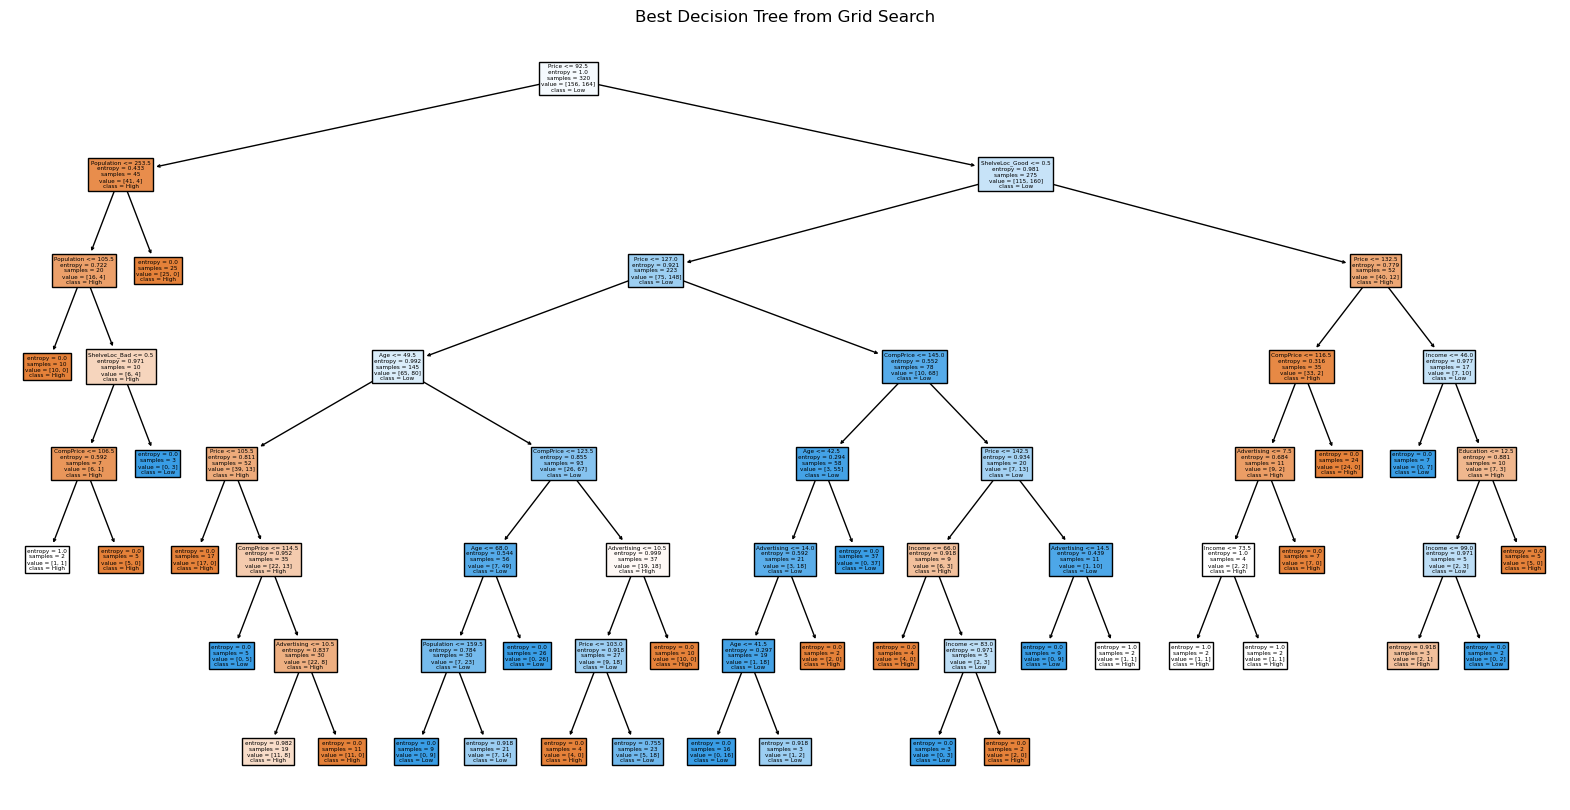

Metrics:
Accuracy: 0.7125
Precision: 0.7272727272727273
Recall: 0.7441860465116279
F1 Score: 0.735632183908046
Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("Company_Data.csv")

# Convert 'Sales' into a categorical variable
data['Sales_Category'] = pd.qcut(data['Sales'], q=2, labels=['Low', 'High'])

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'])

# Define features and target variable
X = data_encoded.drop(['Sales', 'Sales_Category'], axis=1)
y = data_encoded['Sales_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Extract the best estimator
best_clf = grid_search.best_estimator_

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=best_clf.classes_)
plt.title('Best Decision Tree from Grid Search')
plt.show()

# Evaluate the best decision tree classifier
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='High')
recall = recall_score(y_test, y_pred, pos_label='High')
f1 = f1_score(y_test, y_pred, pos_label='High')

print("Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)
